In [274]:
# %load progress.py
"""PIV Algorithm
1) Process the images and gray scale them.
2) Loop through the images with interrogation windows.
3) For every window, compute the Fourier transforms.
4) Find the relative displacement in each position.
5) Compute the displacement vector by subtracting the peak position from the center position.
6) Return the displacement vector and plot the velocity field.
"""

import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
from PIL import Image



In [275]:
# Example usage with two images
image_path = ['F_00001.bmp', 'F_00002.bmp']
image1 = Image.open(image_path[0]).convert('L')
image2 = Image.open(image_path[1]).convert('L')


In [276]:
def preprocess_image(image):
    """Convert image to numpy array and normalize."""
    return np.array(image) / 255.0

In [277]:

# Convert images to numpy arrays
#image1 = preprocess_image(image1)
# image2 = preprocess_image(image2)

# image1 = np.array(image1)[:64, :64]
# image2 = np.array(image2)[:64, :64]

# image1 = np.array(image1)[-64:, -64:]
# image2 = np.array(image2)[-64:, -64:]


# image1 = np.array(image1)
# image2 = np.array(image2)

image1 = preprocess_image(image1)
image2 = preprocess_image(image2)

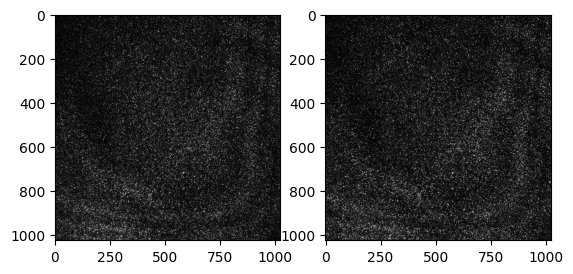

In [278]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')
plt.show()

In [279]:
def cross_correlation_fft(window1, window2):
    """Compute cross-correlation using FFT."""
    f1 = fft.fft2(window1)  # FFT for window1
    f2 = fft.fft2(window2)  # FFT for window2
    f2_conj = np.conj(f2)  # Finding the conjugate of window2
    cross_corr = fft.fftshift(fft.ifft2(f1 * f2_conj))  # Multiplication in complex is convolution in spatial (correlation)
    cross_corr_abs = np.abs(cross_corr)  # Calculating the absolute value of the correlation
    width, height = cross_corr_abs.shape  # Initializing dimensions
    peak_x, peak_y = np.unravel_index(np.argmax(cross_corr_abs),
                                      cross_corr_abs.shape)  # Get indices where correlation function is maximum.
    dx = peak_x - (width // 2)  # Calculating displacement relative to the center
    dy = peak_y - (height // 2)  # Calculating displacement relative to the center
    """Note:
    Positive dx means a shift to the right.
    Negative dx means a shift to the left.
    Positive dy means a shift downward.
    Negative dy means a shift upward.
    """
    return dx, dy

In [280]:
window_size = 64
overlap = 0.5
# def compute_cross_function(image1, image2, window_size=32, overlap=0.5):
"""Compute velocity vectors from two images."""
step = int(window_size * (1 - overlap))  # Calculate step size based on overlap
height, width = image1.shape  # Initialize array sizes
"""Initialize the displacement vectors"""

# x_displacement, y_displacement = compute_cross_function(image1, image2, window_size)  # Getting displacements array
step = window_size // 2  # Vector will be plotted every step
height, width = image1.shape  # Get the dimensions of the image

"""Only on X,Y values will the vectors be plotted"""
x_positions = np.arange(step, width, step)
y_positions = np.arange(step, height, step)
X, Y = np.meshgrid(x_positions, y_positions)
U, V = np.zeros_like(X), np.zeros_like(Y)

# x_displacement = np.zeros_like(X)
# y_displacement = np.zeros_like(Y)

# x_displacement = list(range(0, height - window_size, step))
# y_displacement = list(range(0, width - window_size, step))

"""Iteration of both window 1 and 2 together with the assumption most of the particles didn’t exit the window"""
for ci, i in enumerate(y_positions-step):
    for cj, j in enumerate(x_positions-step):
        center_i = i + window_size // 2
        center_j = j + window_size // 2
        # print(i,j,i + window_size, j + window_size, center_i, center_j)

        window1 = image1[i:i + window_size, j:j + window_size]  # Current image1's window
        window2 = image2[i:i + window_size, j:j + window_size]  # Current image2's window
        U[cj,ci], V[cj,ci] = cross_correlation_fft(window1, window2)  # Getting displacements


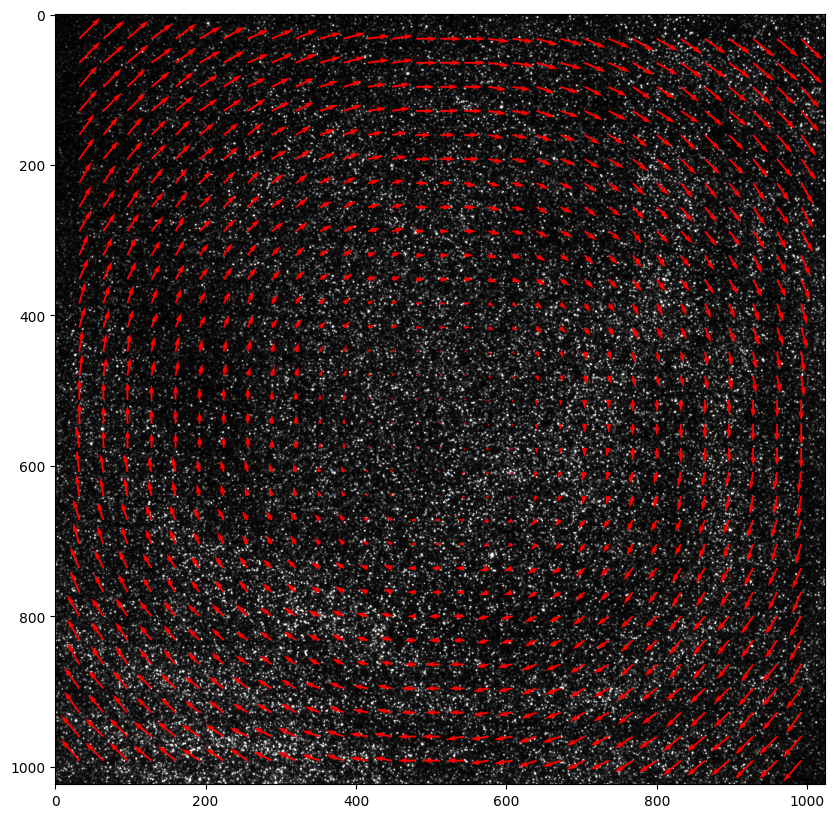

In [281]:
plt.figure(figsize=(10, 10))
plt.imshow(image1, cmap='gray')
plt.quiver(X, Y, U, V, color='r', angles='xy', scale_units='xy', scale=.25)
